<h1>Wholesale Customers Data Clustering</h1>

<h3>Importing Libraries</h3>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

<h3>Load The Customers Dataset</h3>

In [28]:
df = pd.read_csv("Wholesale customers data.csv")

<h3>Display The Top 7 values for df</h3>

In [29]:
df.head(7)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545


<h3>Data Exploration For Info, Describe, Null Cells, Duplicated Cells</h3>

In [30]:
print(f'Information of dataset:\n')
print(df.info())
print("Basic Calculation Through Describe: ")
print(df.describe())

Information of dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None
Basic Calculation Through Describe: 
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       

In [31]:
print("To check Out the total sum of null values: \n")
print(df.isnull().sum())
print("\nTo check Out the total sum of duplicated values: \n")
print(df.duplicated())

To check Out the total sum of null values: 

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

To check Out the total sum of duplicated values: 

0      False
1      False
2      False
3      False
4      False
       ...  
435    False
436    False
437    False
438    False
439    False
Length: 440, dtype: bool


<h3>Normalization For Scalling</h3>

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [33]:
# plt.figure(figsize=(8,6))
# plt.scatter(scaled_data[:,0], scaled_data[:,1])
# plt.title("Visualisation")
# plt.show()

<h3>PCA For Visualization And Make Dataset Into Two Dimensional</h3>

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.38750123 0.22374588]


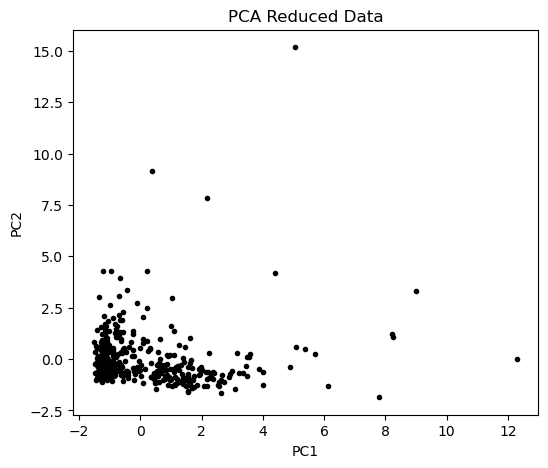

In [35]:
plt.figure(figsize=(6,5))
plt.scatter(reduced_data[:,0], reduced_data[:,1], marker=".", c='k')
plt.title("PCA Reduced Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

<h3>Kmeans Clustering With Elbow Method For Fixing The Value For 'k'.</h3>

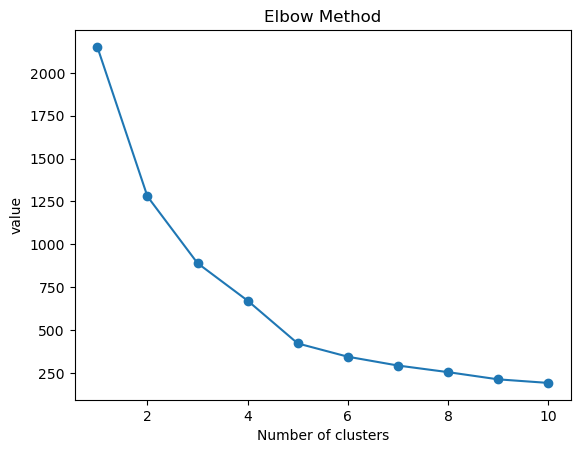

In [36]:
value = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(reduced_data)
    value.append(km.inertia_)

plt.plot(range(1, 11), value, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('value')
plt.title('Elbow Method')
plt.show()

<h3>K-means Clustering</h3>

<h3>As we see that 4 and 5 value best it's curve tell us about "k" value</h3>

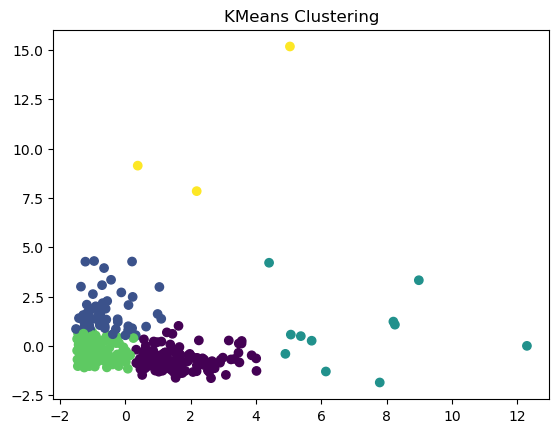

In [37]:
kmeans = KMeans(n_clusters=5, random_state=42)
labels_kmeans = kmeans.fit_predict(reduced_data)

# Visualization
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=labels_kmeans, cmap='viridis')
plt.title("KMeans Clustering")
plt.show()

<h3>DB-Scan Model</h3>

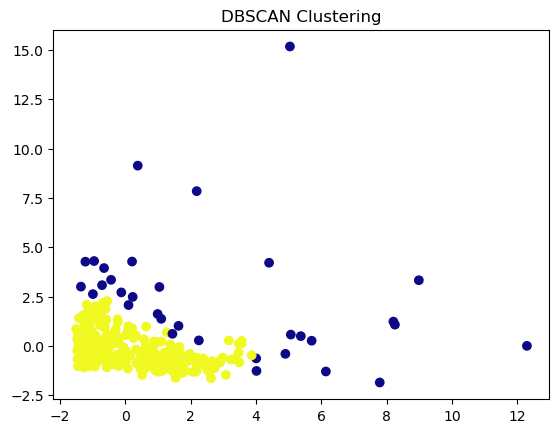

In [38]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(reduced_data)

plt.scatter(reduced_data[:,0], reduced_data[:,1], c=labels_dbscan, cmap='plasma')
plt.title("DBSCAN Clustering")
plt.show()

<h3>Hierarchical Clustering Model</h3>

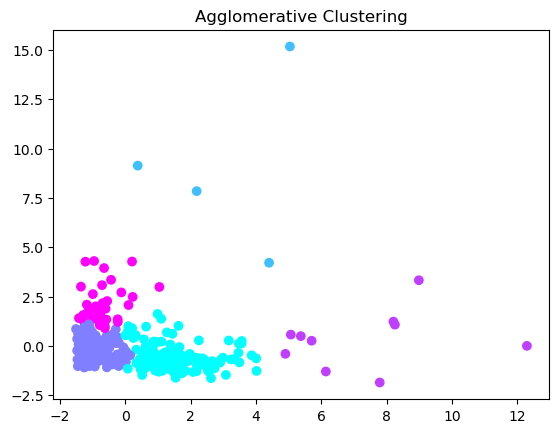

In [39]:
agglo = AgglomerativeClustering(n_clusters=5)
labels_agglo = agglo.fit_predict(reduced_data)

plt.scatter(reduced_data[:,0], reduced_data[:,1], c=labels_agglo, cmap='cool')
plt.title("Agglomerative Clustering")
plt.show()

<h3>Model Evaluation For K-Means Clustering</h3>

In [40]:
print("KMeans Silhouette Score:", silhouette_score(reduced_data, labels_kmeans))
print("KMeans Davies-Bouldin Index:", davies_bouldin_score(reduced_data, labels_kmeans))

KMeans Silhouette Score: 0.5319846604695938
KMeans Davies-Bouldin Index: 0.661636402396666


<h3>Model Evaluation For DB-Scan Model</h3>

In [41]:
print("DBSCAN Silhouette Score:", silhouette_score(reduced_data, labels_dbscan))
print("DBSCAN Davies-Bouldin Index:", davies_bouldin_score(reduced_data, labels_dbscan))

DBSCAN Silhouette Score: 0.6221672862669889
DBSCAN Davies-Bouldin Index: 1.3396414993038281


<h3>Model Evaluation For Hierarchical Clustering Model </h3>

In [42]:
print("Hierarchical Clustering Silhouette Score:", silhouette_score(reduced_data, labels_agglo))
print("Hierarchical Clustering Davies-Bouldin Index:", davies_bouldin_score(reduced_data, labels_agglo))

Hierarchical Clustering Silhouette Score: 0.538094447725987
Hierarchical Clustering Davies-Bouldin Index: 0.6343383430152578
